In [1]:
import qiskit
import numpy as np
import qtm.constant, qtm.nqubit
import importlib

importlib.reload(qtm.nqubit)

<module 'qtm.nqubit' from 'c:\\Users\\haime\\OneDrive\\Máy tính\\QuantumTomography\\codes\\qtm\\nqubit.py'>

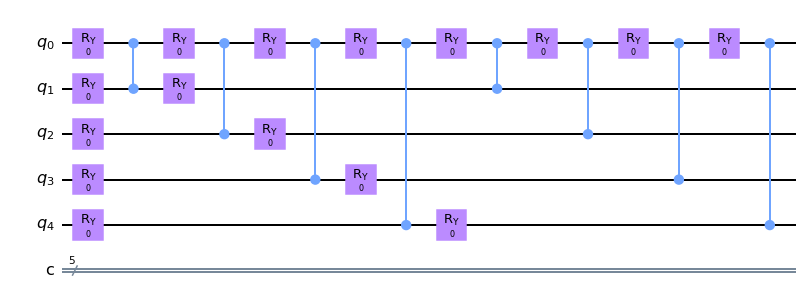

In [23]:
num_qubits = 5
num_layers = 2
thetas = np.zeros(num_layers*(2*num_qubits - 2))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
qc.draw('mpl')

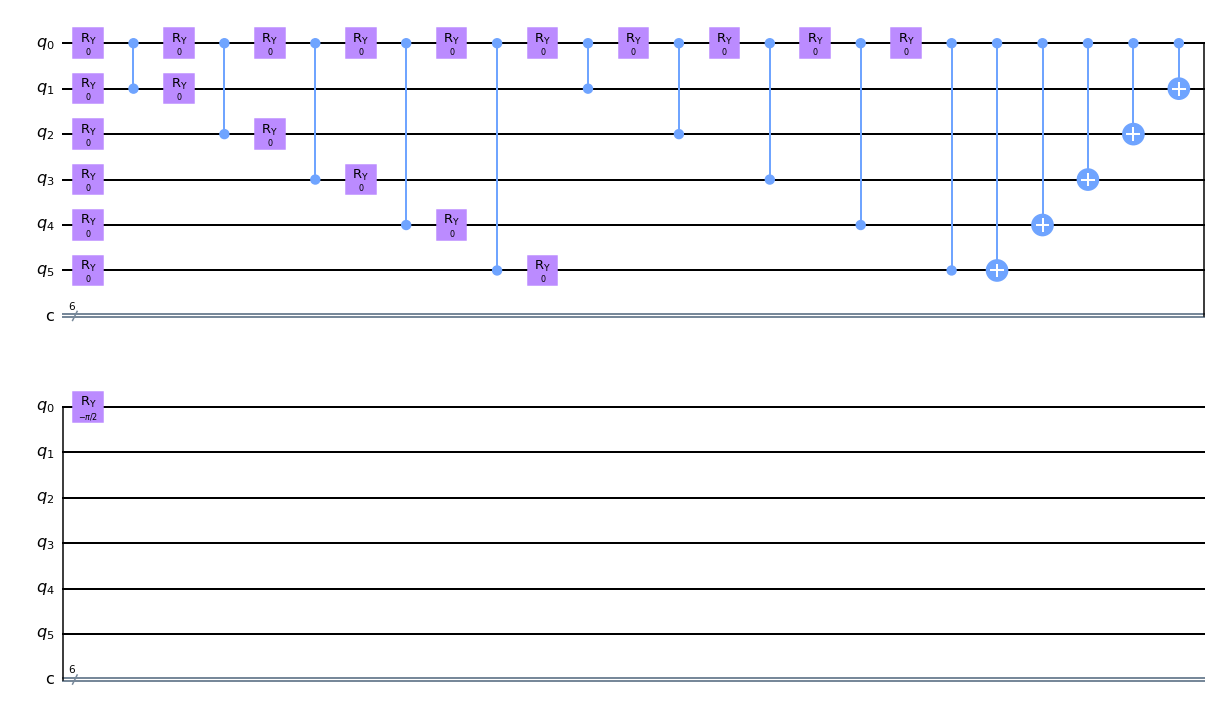

In [31]:
num_qubits = 10
num_layers = 2
theta = np.pi / 2
thetas = np.zeros(num_layers*(2*num_qubits - 2))
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.nqubit.create_GHZchecker_star2graph(qc, thetas, num_layers, theta)
qc.draw('mpl')

In [2]:
# Init parameters
num_qubits = 10
num_layers = 2
thetas = np.ones(num_layers*(2*num_qubits - 2))
# For determine GHZ state

theta = np.pi/2

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_GHZchecker_star2graph, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.adam,
    verbose = 1,
    theta = theta,
    num_layers = num_layers,
    is_return_all_thetas = True
)


Step: 100%|██████████| 100/100 [24:06<00:00, 14.46s/it]


In [3]:
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/loss_values_adam.csv", loss_values, delimiter=",")
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/thetass_adam.csv", thetass, delimiter=",")

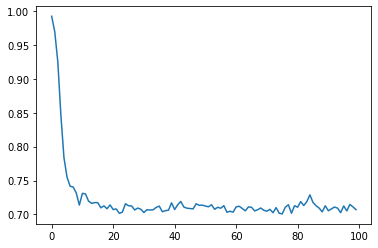

In [4]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [5]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/traces_adam.csv", traces, delimiter=",")
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/fidelities_adam.csv", fidelities, delimiter=",")

### W state preparation

In [21]:
# Init parameters
num_qubits = 8
num_layers = 2
thetas = np.ones(num_layers*(2*num_qubits - 2))

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_star2graph, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.sgd,
    verbose = 1,
    num_layers = num_layers,
    is_return_all_thetas = True
)

np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/loss_values_sgd.csv", loss_values, delimiter=",")
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/thetass_sgd.csv", thetass, delimiter=",")

Step: 100%|██████████| 100/100 [19:25<00:00, 11.66s/it]


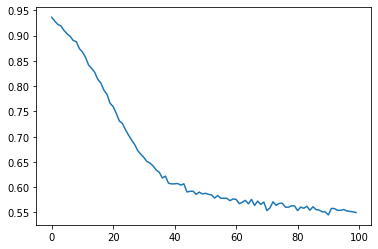

In [22]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [23]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/traces_sgd.csv", traces, delimiter=",")
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/fidelities_sgd.csv", fidelities, delimiter=",")